In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 문제 정의
- 화이트, 레드 와인 분류

In [3]:
wine = pd.read_csv('./data/wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
wine.shape

(6497, 13)

In [6]:
wine.info() 
# 데이터 타입 : DataFrame 
# fit(학습을 할때 오류가 나는 이유) : 규격, 결측치, Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
wine.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

## 전처리

In [8]:
wine.corr()  # corr() : 컬럼들간의 상관관계
             # -1 ~ 1 사이의 범위에 표현

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


In [55]:
# 답
wine.iloc[0:6497, 12:13]

,type
0,1
1,1
2,1
3,1
4,1
...,...
6492,0
6493,0
6494,0
6495,0


In [56]:
# 'quality' : 품질(0~10, 높을수록 좋음), 7개 등급으로 구별됨
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [57]:
# 등급별 와인 개수
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

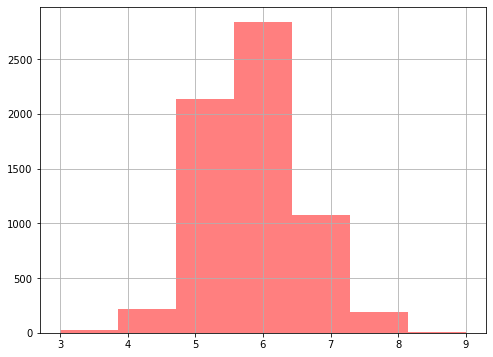

In [58]:
# 시각화
plt.figure(figsize=(8,6))
plt.hist(wine['quality'], bins=7, facecolor='red', alpha=0.5)
plt.grid()
plt.show()

In [59]:
# 0,화이트와인 : 4898개
# 1,레드와인 : 1599개
wine['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [60]:
y = wine['type'] # 답을 y변수에
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [61]:
X = wine.drop(['type'], axis=1)
X  # 답을 제외환 나머지값 분리

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## train, test 분리

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [64]:
# 확인차 학습데이터 화이트와인 3911개, 레드와인 1286개
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3904, 1293], dtype=int64))

## 모델링
- 4개 모델

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

In [66]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi = LogisticRegression()
svm = LinearSVR()

In [67]:
knn_result = cross_val_score(knn, X_train, y_train, cv = 5)
tree_result = cross_val_score(tree, X_train, y_train, cv = 5)
logi_result = cross_val_score(logi, X_train, y_train, cv = 5)
svm_result = cross_val_score(svm, X_train, y_train, cv = 5)

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [68]:
print('knn : ', knn_result.mean())
print('tree : ', tree_result.mean())
print('logi : ', logi_result.mean())
print('svm : ', svm_result.mean())

knn :  0.9401567705634115
tree :  0.9836449618716221
logi :  0.9778722144073443
svm :  -0.24170551236610147


### 스케일링

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
mms = MinMaxScaler()

In [71]:
mms.fit(X_train)

MinMaxScaler()

In [72]:
X_train_s = mms.transform(X_train)
X_test_s = mms.transform(X_test)

In [73]:
knn_result2 = cross_val_score(knn, X_train_s, y_train, cv = 5).mean()
tree_result2 = cross_val_score(tree, X_train_s, y_train, cv = 5).mean()
logi_result2 = cross_val_score(logi, X_train_s, y_train, cv = 5).mean()
svm_result2 = cross_val_score(svm, X_train_s, y_train, cv = 5).mean()

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [74]:
print(knn_result2)
print(tree_result2)
print(logi_result2)
print(svm_result2)

0.9901861997482786
0.9821063152439475
0.9863380099207818
0.8565825434066172


In [75]:
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
logi.fit(X_train, y_train)
svm.fit(X_train_s, y_train)

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [76]:
print('knn :', knn.score(X_test, y_test))
print('tree :', tree.score(X_test, y_test))
print('logi :', logi.score(X_test, y_test))
print('svm :', svm.score(X_test_s, y_test))

knn : 0.9453846153846154
tree : 0.9892307692307692
logi : 0.9838461538461538
svm : 0.8608891896848196


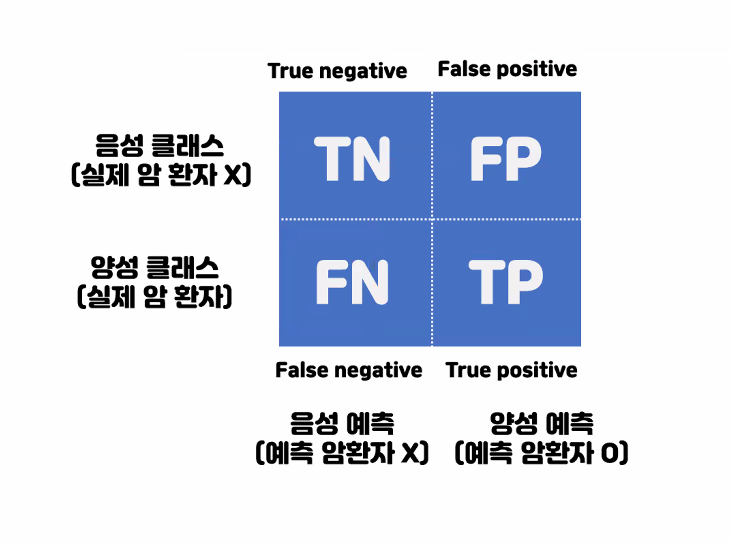

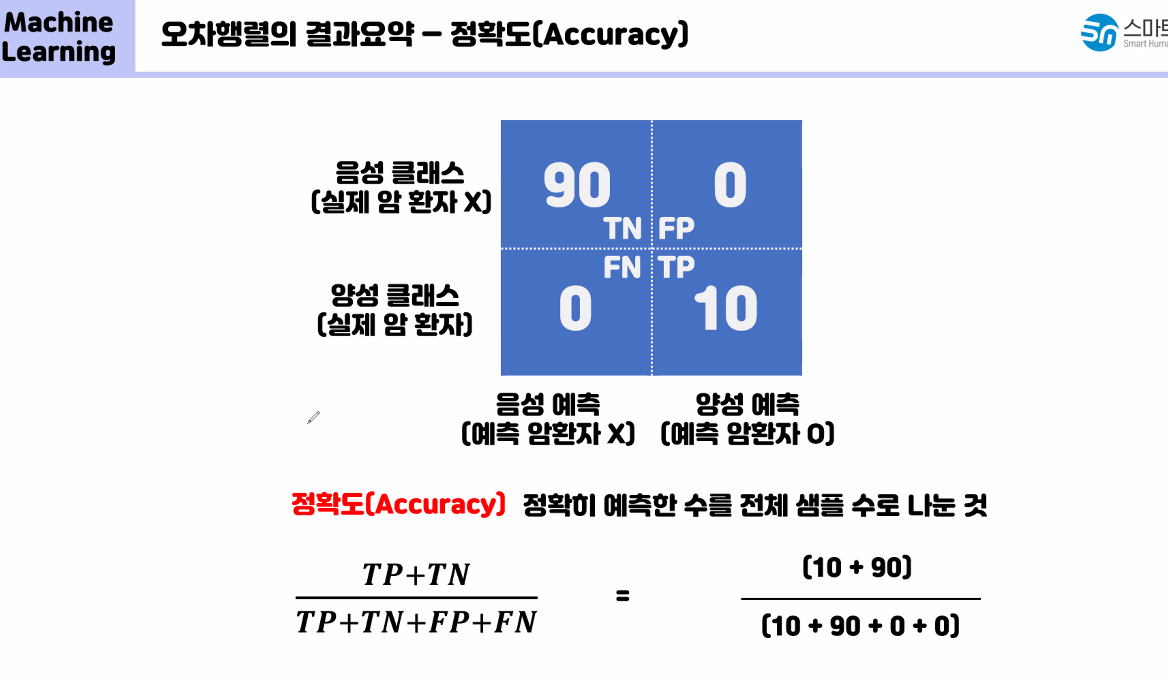

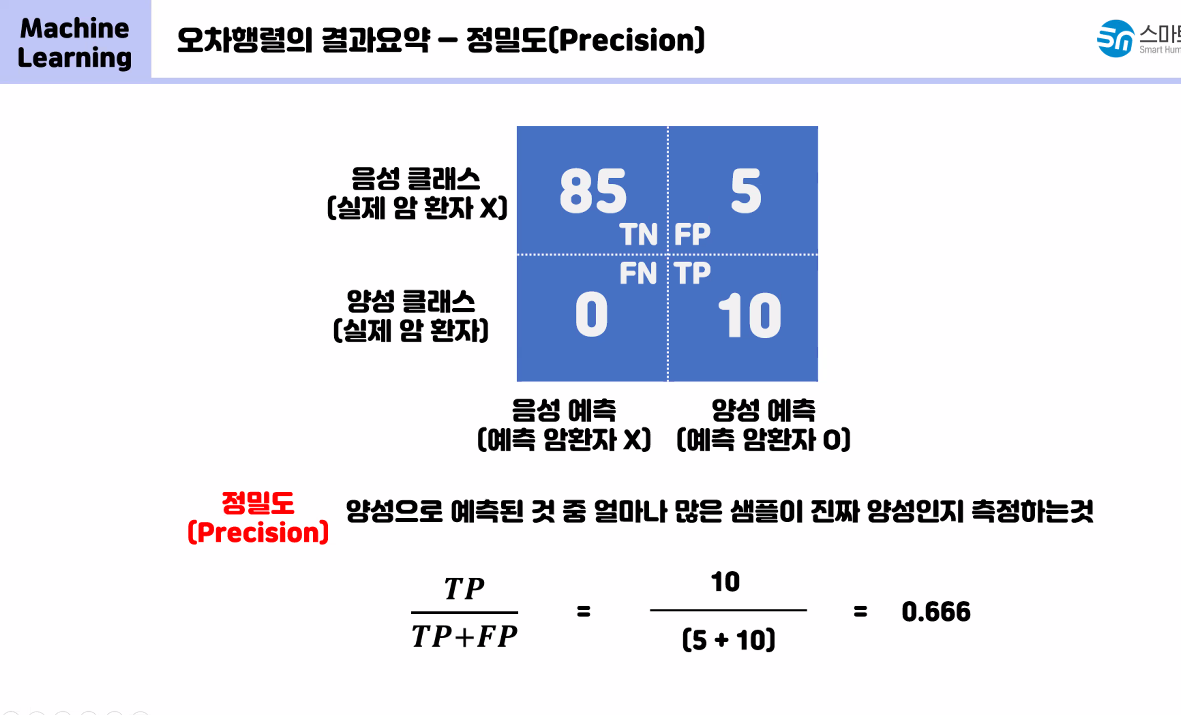

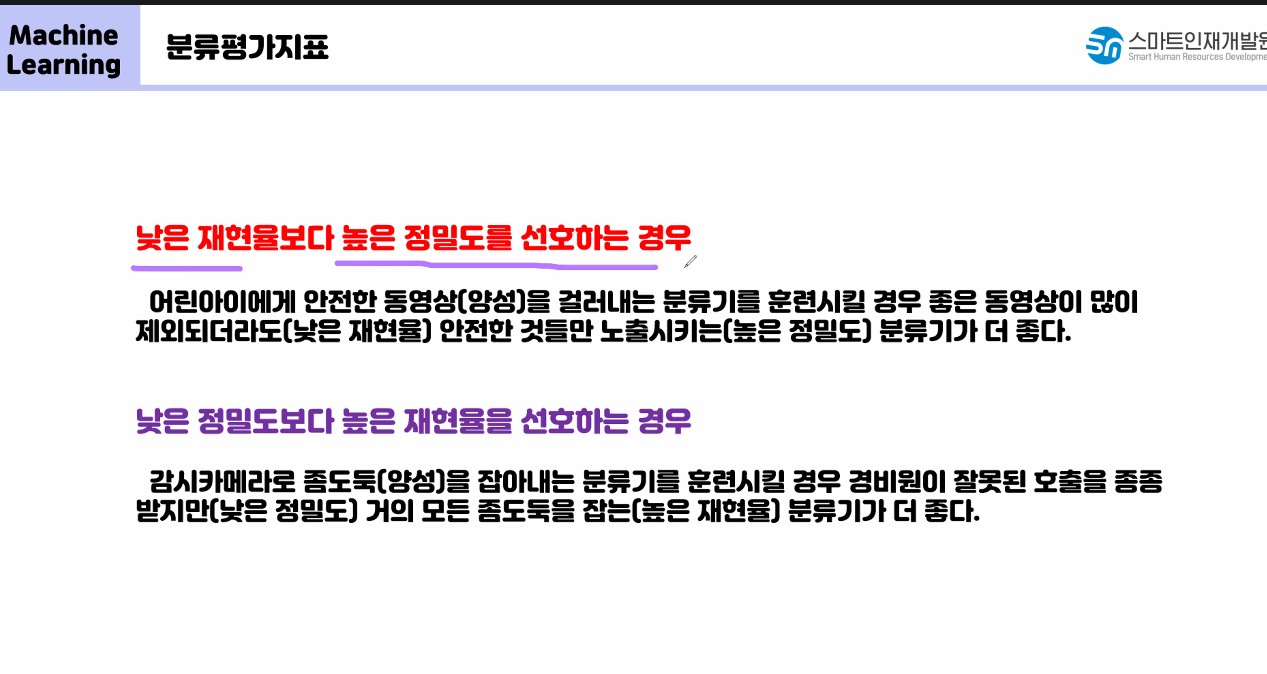

- 지도 학습 : 정확한 답이 주어진 것
- 비지도 학습 : 특징이나 패턴
- 강화 학습: 로봇이나 기계에 적절
- 특징, 예시
